# integ_ode
+ [Numerical integration](https://www.sfu.ca/math-coursenotes/Math%20158%20Course%20Notes/sec_Numerical_Integration.html)
+ [Ordinary differential equation](https://mathworld.wolfram.com/OrdinaryDifferentialEquation.html)
+ [Boundary conditions](http://www.multiphysics.us/BC.html)

## questions

### part a (in-class)
1. Numerical integration of $\displaystyle \int_a^b f(x) \ dx$ can be approximated by $\displaystyle \left[ \alpha f(a) + \beta f\left( \frac{a+b}{2} \right) + \gamma f(b) \right] \frac{(b-a)}{n}$. Write the relation between $\alpha$, $\beta$, $\gamma$, and $n$.
2. Replace the `?` with the right number in following table.
Method | $\alpha$ | $\beta$ | $\gamma$ | $n$
:- | :-: | :-: | :-: | :-:
Rectangle left point | `?` | `?` | `?` | `?`
Rectangle mid point | `?` | `?` | `?` | `?` 
Rectangle right point | `?` | `?` | `?` | `?`
Trapezium | `?` | `?` | `?` | `?`
Simpson | `?` | `?` | `?` | `?`
3. Tell the difference between initial value problem (IVP) and boundary value problem (BVP).
4. Ilustrate the domain and boundary for a BVP using common symbols.
5. Explain about five different boundary conditions (BCs) in solving ODE as a BVP.

### part b (take-home)
1. For $f(x) = \sin x$ and $0 \le x \le \pi$ make code to calculate area below the curve using rectangle left point, rectangle mid point, rectangle right point, trapezium, and Simpson method for $10$ partition. Explain which method gives the best result. What is the analytical solution of the problem? Name each method with different function, e.g `rectl()`, `rectm()`, `rectr()`, `trapez()`, and `simpson()` with `xbeg`, `xend`, `partition` as parameters.
2. Using Finite Difference Method (FDM) find plot the curve of vertical position $y$ againts time $t$ for a free fall motion if $y_0 = 10 \ \rm m$, $y_t = 20 \ \rm m$, $g = -10  \ \rm m/s^2$ with number of grid $n = 10, 20, 40, 80, 160$ by modifying [a code](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.03-Finite-Difference-Method.html). Explain the form of the curve. Which $n$ gives better result?

## answers

+ Put your answers of part b below this cell.
+ Write only one answer in one Code cell.
+ There must be **at least two Code cells**.
+ Existence of additional Markdown cells for explanation are optional.

In [3]:
import math

def f(x):
    fx = math.sin(x)
    return fx

def rectl(x_beg,x_end,partition):
    a = x_beg
    b = x_end

    N = partition
    dx = (b - a) / N
    x = [a + i*dx for i in range(N)]

    # calculate area
    L = 0
    for xi in x:
        Li = f(xi) * dx
        L += Li
    print("L =", L)

def rectm(x_beg,x_end,partition):
    a = x_beg
    b = x_end

    N = partition
    dx = (b - a) / N
    x = [a + i*dx for i in range(N)]

    M = 0
    for xi in x:
        Mi = f(xi + dx) * dx
        M += Mi
    print("M =", M)

def rectr(x_beg,x_end,partition):
    a = x_beg
    b = x_end

    N = partition
    dx = (b - a) / N
    x = [a + i*dx for i in range(N)]

    R = 0
    for xi in x:
        Ri = f(xi + dx) * dx
        R += Ri
    print("R =", R)

def trapez(x_beg,x_end,partition):
    a = x_beg
    b = x_end

    N = partition
    dx = (b - a) / N
    x = [a + i*dx for i in range(N)]

    T = 0
    for xi in x:
        Ti = (f(xi) + f(xi + dx)) * (dx / 2)
        T += Ti
    print("T =", T)

def simp(x_beg,x_end,partition):
    a = x_beg
    b = x_end

    N = partition
    dx = (b - a) / N
    x = [a + i*dx for i in range(N)]

    S = 0
    for xi in x:
        Si = (f(xi) + 4*f(xi + 0.5*dx) + f(xi + dx)) * (dx / 6)
        S += Si
    print("S =", S)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[ 0.  -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 20. ]


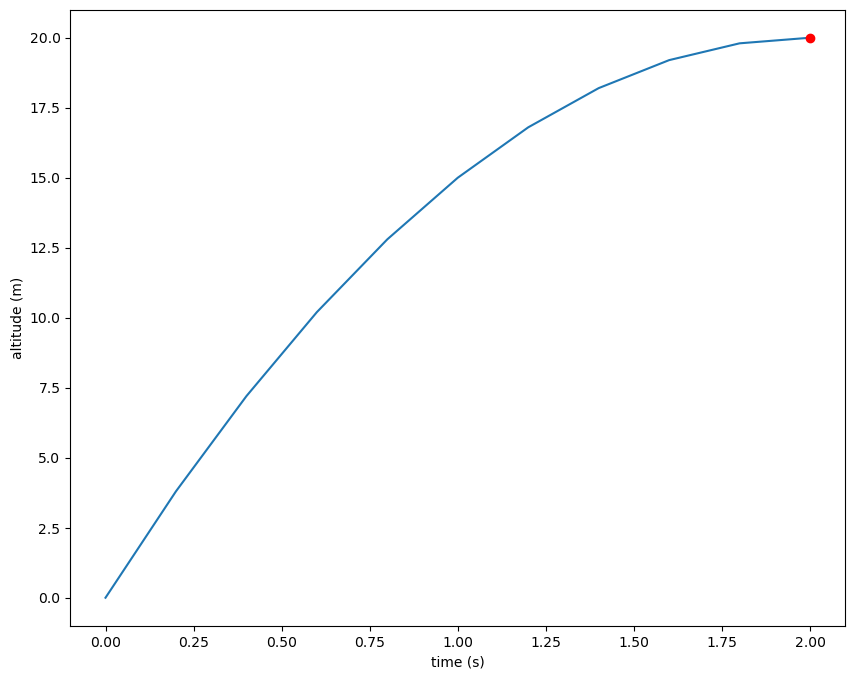

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 10
h = (2-0) / n

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1

print(A)

# Get b
b = np.zeros(n+1)
b[1:-1] = -10*h**2
b[-1] = 20
print(b)

# solve the linear equations
y = np.linalg.solve(A, b)

t = np.linspace(0, 2, 11)

plt.figure(figsize=(10,8))
plt.plot(t, y)
plt.plot(2, 20, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.show()